<a href="https://colab.research.google.com/github/khanhkhanhlele/ML-lab/blob/main/Session_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Word2vec

###[Embedding](https://machinelearningcoban.com/tabml_book/ch_embedding/embedding.html)


- là một kĩ thuật đưa 1 vector có số chiều lớn (thường ở dạng thưa) về vector có số chiều nhỏ hơn, thường ở dạng dày đặc
- hữu ích đối với những bài toán biểu diễn dưới dạng one-hot-coding. 
- đặc biệt đối với việc vector một bộ từ điển, cần biểu diễn mỗi quan hệ giữa các từ với nhau thay vì $[0,0,...,1,..,0,0]$.
- một từ điển gồm $N$ từ $(w_1,w_2,...,w_N)$, chiều kg embedding $d$. ⇒ biểu diễn embedding cho $N$ từ bằng matrix $E ∈ \mathbb{R}^{N×k}$. Với $o_i$ là one-hot của từ $w_i$ thì $e = o_i^T E$ là biểu diễn từ đó trong kg embedding.
- ma trận $E$ có thể được coi là một ma trận có trọng số của một tầng tuấn tính trong một mạng neural nhân tạo.
- word2vec là pp về xây dựng embedding dựa trên một mạng học sâu, các vector embedding dựa trên thứ tự từ trong câu của một bộ dữ liệu lớn mà không cần biết ý nghĩa cụ thể
- mục đích của việc tạo embedding là đưa các giá trị hạng mục về một không gian sao embedding các giá trị tương tự nhau sẽ nằm gần nhau
- có 3 phép đo thường sử dụng tính khoảng cách 2 embedding: kc Euclid, tích vô hướng, độ tương tự cosine

###[Word2vec](https://machinelearningcoban.com/tabml_book/ch_embedding/word2vec.html)

- xét đối với câu "Hà Nội là ... của Việt Nam". Ta muốn xác suất ... là thủ đô cao nhất.
- "thủ đô" : target word, từ xung quanh : context word
- $C$ : hằng số , xét các context word cách target word $C/2$
- đối với 1 từ nếu nó là target word thì embedding word là $u$ còn nếu nó là context word thì embedding tương ứng là $v$ ⇒ 2 ma trận embedding $U, V$
có 2 cách xây dựng mô hình word2vec:

###Skip-gram:

- dự đoán từ ngữ cảnh nếu biết từ đích 
- hàm mất mát: $\mathcal{L}(\mathbf{U}, \mathbf{V}; w_t) = -\sum_{c \in \mathcal{C}_t} \log \frac{\exp(\mathbf{u}_t^T\mathbf{v}_c)}{\sum_{i=1}^{N}\exp(\mathbf{u}_t^T\mathbf{v}_i)}$
- biểu diễn dưới dạng mạng neural:
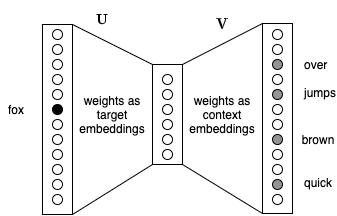


###Continous Bag of Words (CBOW)

- dự đoán từ đích nếu biết các từ ngữ cảnh
- loss function: $P(w_t | \bar{w}_{\mathcal{C}_t}) = \frac{\exp\left(\mathbf{u}_t^T\frac{1}{C}\sum_{c \in \mathcal{C}_t}\mathbf{v}_c\right)}{\sum_{i=1}^N\exp\left(\mathbf{u}_i^T\frac{1}{C}\sum_{c \in \mathcal{C}_t}\mathbf{v}_c\right)}
$
- biểu diễn dưới dạng mạng neural: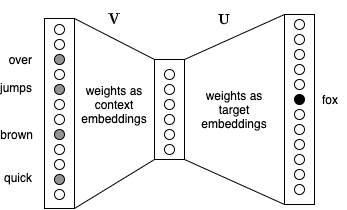

#RNNs

- sử dụng cho bài toán có đầu vào dạng chuỗi 
- mô hình RNN giống mô dùng NN dùng nhiều lần với cùng W, U theo hình vẽ:
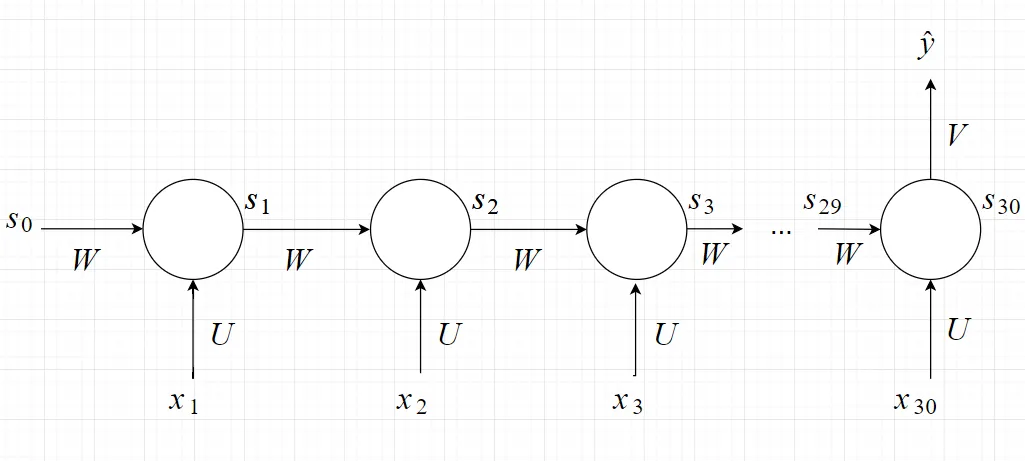

- sử dụng mạng RNN sẽ hay xảy ra hiện tượng vanishing gradient nên người ta sẽ sử dụng LSTM

#LSTM

chưa hiểu phần preprocessing nên thử dụng trên bộ MINS

In [19]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [20]:
mnist = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
sample, sample_label = x_train[0], y_train[0]

In [39]:
batch_size = 64
# Each MNIST image batch is a tensor of shape (batch_size, 28, 28).
# Each input sequence will be of size (28, 28) (height is treated like time).
input_dim = 28

units = 64
output_size = 10  # labels are from 0 to 9

# Build the RNN model
def build_model(allow_cudnn_kernel=True):
    # CuDNN is only available at the layer level, and not at the cell level.
    # This means `LSTM(units)` will use the CuDNN kernel,
    # while RNN(LSTMCell(units)) will run on non-CuDNN kernel.
    if allow_cudnn_kernel:
        # The LSTM layer with default options uses CuDNN.
        lstm_layer = keras.layers.LSTM(units, input_shape=(None, input_dim))
    else:
        # Wrapping a LSTMCell in a RNN layer will not use CuDNN.
        lstm_layer = keras.layers.RNN(
            keras.layers.LSTMCell(units), input_shape=(None, input_dim)
        )
    model = keras.models.Sequential(
        [
            lstm_layer,
            keras.layers.BatchNormalization(),
            keras.layers.Dense(output_size),
        ]
    )
    return model
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_4 (Batc  (None, 28, 28)           112       
 hNormalization)                                                 
                                                                 
 dense_5 (Dense)             (None, 28, 10)            290       
                                                                 
Total params: 402
Trainable params: 346
Non-trainable params: 56
_________________________________________________________________


In [40]:
model = build_model(allow_cudnn_kernel=True)

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer="sgd",
    metrics=["accuracy"],
)


model.fit(
    x_train, y_train, validation_data=(x_test, y_test), batch_size=batch_size, epochs=1
)

938/938 [==============================] - 22s 22ms/step - loss: 0.9847 - accuracy: 0.6907 - val_loss: 0.5274 - val_accuracy: 0.8392
